In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Visualising Dataset 

Text(0.5, 1, 'Survived vs Pclass on the basis of gender')

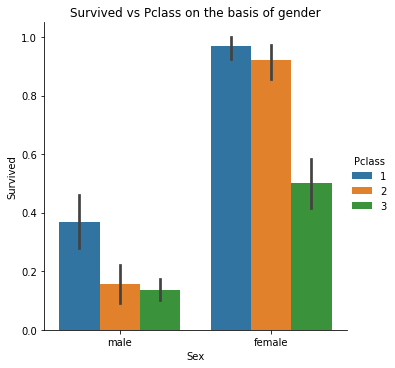

In [7]:
# SURVIVED VS PCLASS
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=dataset)
plt.title("Survived vs Pclass on the basis of gender")

Text(0.5, 1.0, 'Survived per Pclass')

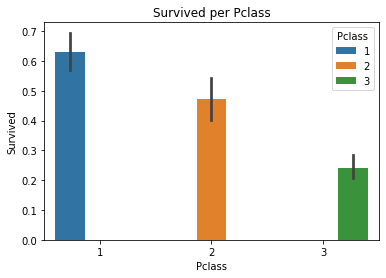

In [8]:
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=dataset)
plt.title("Survived per Pclass")
#dataset.plot(kind='pie', y = 'Survived',  autopct='%1.1f%%', 
 #startangle=90, shadow=False, labels=dataset['Pclass'], legend = False, fontsize=14)

Text(0.5, 1.0, 'Count of Survived')

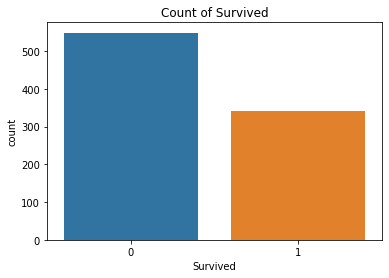

In [9]:
# COUNT OF SURViVED
sns.countplot(x='Survived',data=dataset)
plt.title("Count of Survived")

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Age Distribution')

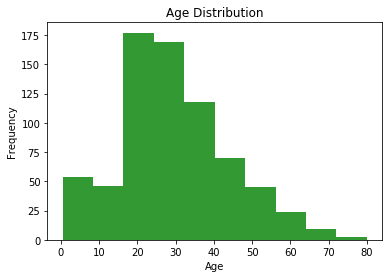

In [10]:
#AGE DISTRIBUTION

plt.hist(dataset["Age"],bins=10,color="green",alpha=0.8)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Average Fare For Each PClass')

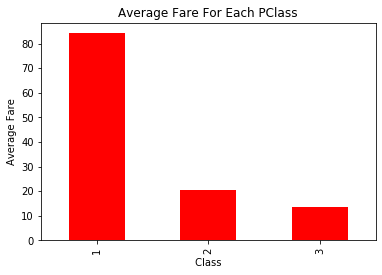

In [11]:
# AVERAGE FARE FOR EACH PCLASS

avg_fare_class = dataset.groupby('Pclass')['Fare'].mean()
avg_fare_class.plot.bar(x=dataset.Pclass, y=avg_fare_class, color = "red")
plt.xlabel(" Class ")
plt.ylabel("Average Fare")
plt.title("Average Fare For Each PClass")

Text(0.5, 1.0, 'Average Fare For Each Port')

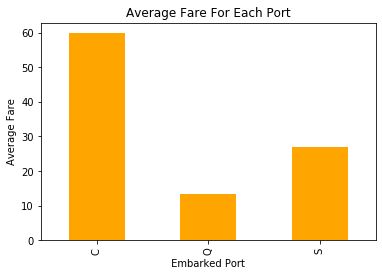

In [12]:
#AVERAGE FARE FOR EACH EMBARKED PORT
avg_fare_embarked = dataset.groupby('Embarked')['Fare'].mean()
avg_fare_embarked.plot.bar(x=dataset.Embarked, y=avg_fare_class, color = "orange")
plt.xlabel(" Embarked Port ")
plt.ylabel("Average Fare")
plt.title("Average Fare For Each Port")

Text(0.5, 1.0, 'Survived vs Embarked Ports')

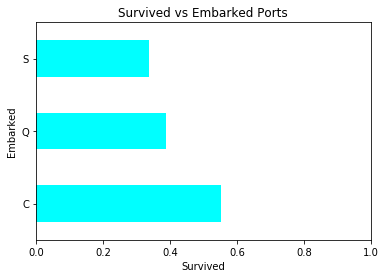

In [13]:
# SURVIVED VS EMBARKED PORT
dataset.groupby('Embarked')['Survived'].mean().plot(kind='barh',xlim=[0,1],color='cyan')
plt.xlabel('Survived')
plt.title("Survived vs Embarked Ports")

## DATA CLEANING AND PREPROCESSING

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Substituting nan values in 'Age' column with mean value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(dataset.iloc[:,5:6])
dataset.iloc[:,5:6] = imputer.transform(dataset.iloc[:,5:6])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
dataset.Embarked.mode()

0    S
dtype: object

In [18]:
dataset.fillna({'Embarked':'S'},inplace=True)

In [19]:
# Encoding for 'Sex' column
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataset.Sex = labelEncoder.fit_transform(dataset.Sex)

In [20]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
#Encoding for Embarked column
data = pd.get_dummies(dataset[['Embarked']])

In [22]:
data.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [23]:
data1 = dataset.iloc[:,0:11]

In [24]:
data1.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'], dtype=object)

In [25]:
final_data = pd.concat((data1,data),axis=1)

In [26]:
final_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1


### CORRELATION

In [27]:
#FINDING CORRELATION
cor_finaldata=final_data.corr()

In [28]:
cor_finaldata

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,-0.001205,0.168240,-0.243292,-0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


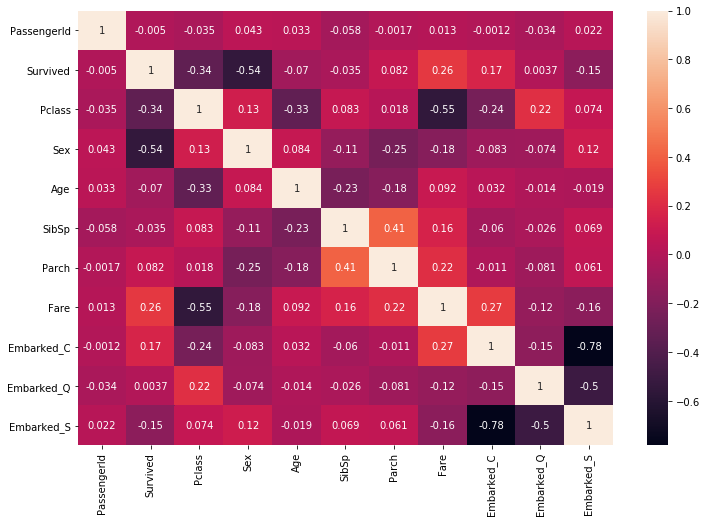

In [29]:
final_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(final_data.corr(),annot=True)

In [30]:
#Correlation with output variable
cor_target = abs(cor_finaldata["Survived"])
cor_target

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Sex            0.543351
Age            0.069809
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Embarked_C     0.168240
Embarked_Q     0.003650
Embarked_S     0.149683
Name: Survived, dtype: float64

#### Finding relevant features for prediction

In [31]:
relevant_features = cor_target[cor_target>0.1]
relevant_features

Survived      1.000000
Pclass        0.338481
Sex           0.543351
Fare          0.257307
Embarked_C    0.168240
Embarked_S    0.149683
Name: Survived, dtype: float64

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(3), uint8(3)
memory usage: 75.8+ KB


In [33]:
X= final_data.loc[:,(['Pclass','Sex','Fare','Embarked_C','Embarked_S'])].values
X

array([[ 3.    ,  1.    ,  7.25  ,  0.    ,  1.    ],
       [ 1.    ,  0.    , 71.2833,  1.    ,  0.    ],
       [ 3.    ,  0.    ,  7.925 ,  0.    ,  1.    ],
       ...,
       [ 3.    ,  0.    , 23.45  ,  0.    ,  1.    ],
       [ 1.    ,  1.    , 30.    ,  1.    ,  0.    ],
       [ 3.    ,  1.    ,  7.75  ,  0.    ,  0.    ]])

## Feature Scaling 

In [34]:
norm = MinMaxScaler()
# normalization
X = norm.fit_transform(X)
X

array([[1.        , 1.        , 0.01415106, 0.        , 1.        ],
       [0.        , 0.        , 0.13913574, 1.        , 0.        ],
       [1.        , 0.        , 0.01546857, 0.        , 1.        ],
       ...,
       [1.        , 0.        , 0.04577135, 0.        , 1.        ],
       [0.        , 1.        , 0.0585561 , 1.        , 0.        ],
       [1.        , 1.        , 0.01512699, 0.        , 0.        ]])

In [35]:
y=final_data.loc[:,['Survived']].values

## Splitting into test and train dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

### 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression(C=0.1)
clf.fit(X_train,y_train.ravel())

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
clf.score(X_test,y_test)

0.7821229050279329

In [39]:
y_pred_log=clf.predict(X_test)

In [40]:
y_pred_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [41]:
confusion_matrix(y_test,clf.predict(X_test))

array([[88, 17],
       [22, 52]], dtype=int64)

In [42]:
log_accuracy_score = accuracy_score(y_test,y_pred_log)*100
log_accuracy_score

78.2122905027933

In [43]:
log_r2_score=r2_score(y_test,y_pred_log)*100
log_r2_score

10.154440154440147

### 2. Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_class= RandomForestClassifier(n_estimators=50)
random_class.fit(X_train,y_train.ravel())
y_pred_random = random_class.predict(X_test)

In [45]:
random_class.score(X_test,y_test)

0.8212290502793296

In [46]:
random_accuracy_score = accuracy_score(y_test,y_pred_random)*100
random_accuracy_score

82.12290502793296

In [47]:
random_r2_score=r2_score(y_test,y_pred_random)*100
random_r2_score

26.280566280566276

### 3. Naive Bayes

In [48]:
NB_classification = GaussianNB();
NB_classification.fit(X_train, y_train)

y_pred_NB = NB_classification.predict(X_test)

y_pred_NB = NB_classification.predict(X_test)
y_pred_NB

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [49]:
cm_NB = confusion_matrix(y_test, y_pred_NB)
print(cm_NB)

[[86 19]
 [21 53]]


In [50]:
NB_accuracy_score = accuracy_score(y_test,y_pred_NB)*100
NB_accuracy_score

77.6536312849162

In [51]:
NB_r2_score=r2_score(y_test,y_pred_NB)*100
NB_r2_score

7.85070785070785

### 4. Support Vector Machine

In [52]:
classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train,y_train.ravel())
y_pred_svm = classifier_svm.predict(X_test)
y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [53]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[88 17]
 [22 52]]


In [54]:
svm_accuracy_score = accuracy_score(y_test,y_pred_svm)*100
svm_accuracy_score

78.2122905027933

In [55]:
svm_r2_score=r2_score(y_test,y_pred_svm)*100
svm_r2_score

10.154440154440147

### 5. Decision Tree

In [56]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
y_pred_decision = decision_tree.predict(X_test)  
y_pred_decision

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [57]:
cm_decision = confusion_matrix(y_test, y_pred_decision)
print(cm_decision)

[[91 14]
 [20 54]]


In [58]:
decision_accuracy_score = accuracy_score(y_test,y_pred_decision)*100
decision_accuracy_score

81.00558659217877

In [59]:
decision_r2_score=r2_score(y_test,y_pred_decision)*100
decision_r2_score

21.67310167310167

### 6. K-Nearest Neighbour Classification

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train.ravel())  
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [61]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[85 20]
 [22 52]]


In [62]:
knn_accuracy_score = accuracy_score(y_test,y_pred_knn)*100
knn_accuracy_score

76.53631284916202

In [63]:
knn_r2_score=r2_score(y_test,y_pred_knn)*100
knn_r2_score

3.2432432432432434

## Checking which model is better

In [64]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'SVM','Decision Tree','K-Nearest Classification'],
    'R2 Score': [log_r2_score, random_r2_score, NB_r2_score, 
              svm_r2_score,decision_r2_score,knn_r2_score],
    'Score': [log_accuracy_score, random_accuracy_score, NB_accuracy_score, 
              svm_accuracy_score,decision_accuracy_score,knn_accuracy_score]})

results

,Model,R2 Score,Score
0,Logistic Regression,10.154440,78.212291
1,Random Forest,26.280566,82.122905
2,Naive Bayes,7.850708,77.653631
3,SVM,10.154440,78.212291
4,Decision Tree,21.673102,81.005587
5,K-Nearest Classification,3.243243,76.536313


In [65]:
#Arranging in descding order of score and r2_score
result_df = results.sort_values(by=('R2 Score'), ascending=False)
result_df = result_df.set_index('R2 Score')
result_df = results.sort_values(by=('Score'), ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,R2 Score
Score,,
82.122905,Random Forest,26.280566
81.005587,Decision Tree,21.673102
78.212291,Logistic Regression,10.154440
78.212291,SVM,10.154440
77.653631,Naive Bayes,7.850708
76.536313,K-Nearest Classification,3.243243


(50, 100)

<Figure size 2160x720 with 0 Axes>

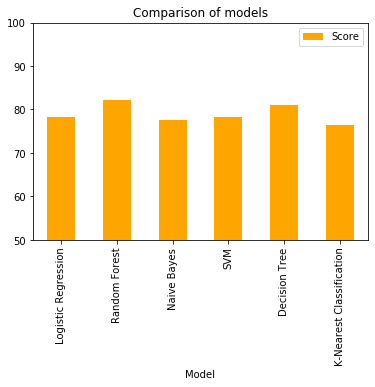

In [66]:
plt.figure(figsize=(30,10))
results.plot.bar(x='Model', y='Score', title="Comparison of models",color='orange')
plt.ylim(ymax = 100, ymin = 50)

#### NOTE: From the plot above and the table, it is clear that thr Random Forest Classifier model will the best approach for prediction since its accuracy score as well as r2 score is maximum. Hence we will go with random forest classifier.

## Further Evaluation Of Random Forest Classifier

### Confusion Matrix

In [67]:
confusion_matrix(y_test,random_class.predict(X_test))

array([[88, 17],
       [15, 59]], dtype=int64)

### Precision Recall

In [68]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, y_pred_random)*100)
print("Recall:",recall_score(y_test, y_pred_random)*100)


Precision: 77.63157894736842
Recall: 79.72972972972973


### F-score

In [69]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_random)*100

78.66666666666666

## Concluding the Predictions for test data

In [70]:
y_test_df = pd.DataFrame(data=y_test,columns={'Y_test'})
y_pred_random_df = pd.DataFrame(data=y_pred_random,columns={'Predictions'})
x_test_df = pd.DataFrame(data=X_test,columns={'Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S'})

In [77]:
prediction_vs_test = pd.concat([x_test_df,y_test_df, y_pred_random_df],axis=1)
prediction_vs_test.head(10)

,Sex,Embarked_S,Embarked_C,Pclass,Fare,Y_test,Predictions
0,1.0,1.0,0.029758,1.0,0.0,1,1
1,0.5,1.0,0.020495,0.0,1.0,0,0
2,1.0,1.0,0.015469,0.0,1.0,0,0
3,0.5,0.0,0.064412,0.0,1.0,1,1
4,1.0,0.0,0.021942,1.0,0.0,1,1
5,0.0,0.0,0.153905,0.0,1.0,1,1
6,1.0,0.0,0.015127,0.0,0.0,1,1
7,1.0,1.0,0.035134,0.0,1.0,0,0
8,1.0,0.0,0.015127,0.0,0.0,1,1
9,0.0,0.0,0.051302,0.0,1.0,1,1
